# Requirements

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import math
import pandas as pd
import matplotlib.pyplot as plt

# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [4]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [11]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [ ]:
# Print the page source code.
print(browser.page_source)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [ ]:
# Write your code here.

In [12]:
total_elements = browser.find_element(By.CSS_SELECTOR, "div.total").text.split(" ")[2]

In [13]:
total_pages = math.ceil(int(total_elements)/25)

In [14]:
total_pages

400

In [15]:
total_elements

'9983'

In [18]:
browser.get('https://finance.yahoo.com/crypto')
all_elements = []
#total_pages+1
for i in range(1, 10):
    rows = browser.find_elements(By.CSS_SELECTOR, "tbody>tr.yf-paf8n5")
    for row in rows:
        columns = row.find_elements(By.CSS_SELECTOR, "td")
        name = columns[1].text
        price = columns[3].text.replace(",", "")
        market_cap = columns[6].text
        
        element_dict = {
            'name': name,
            'price': price,
            'market_cap': market_cap
        }
        all_elements.append(element_dict)
    button = browser.find_element(By.CSS_SELECTOR, "div.buttons button[aria-label='Goto next page']")
    button.click()   
        
    

In [19]:
len(all_elements)

225

In [20]:
all_elements_df = pd.DataFrame(all_elements)
all_elements_df


,name,price,market_cap
0,Bitcoin USD,70244.86,1.389T
1,Ethereum USD,2523.84,303.893B
2,Tether USDt USD,1.0004,120.619B
3,BNB USD,576.78,83.114B
4,Solana USD,166.33,78.294B
...,...,...,...
220,Chintai USD,0.299913,292.271M
221,Holo USD,0.001667,290.056M
222,JUST USD,0.029230,289.375M
223,Ponke USD,0.518917,288.281M


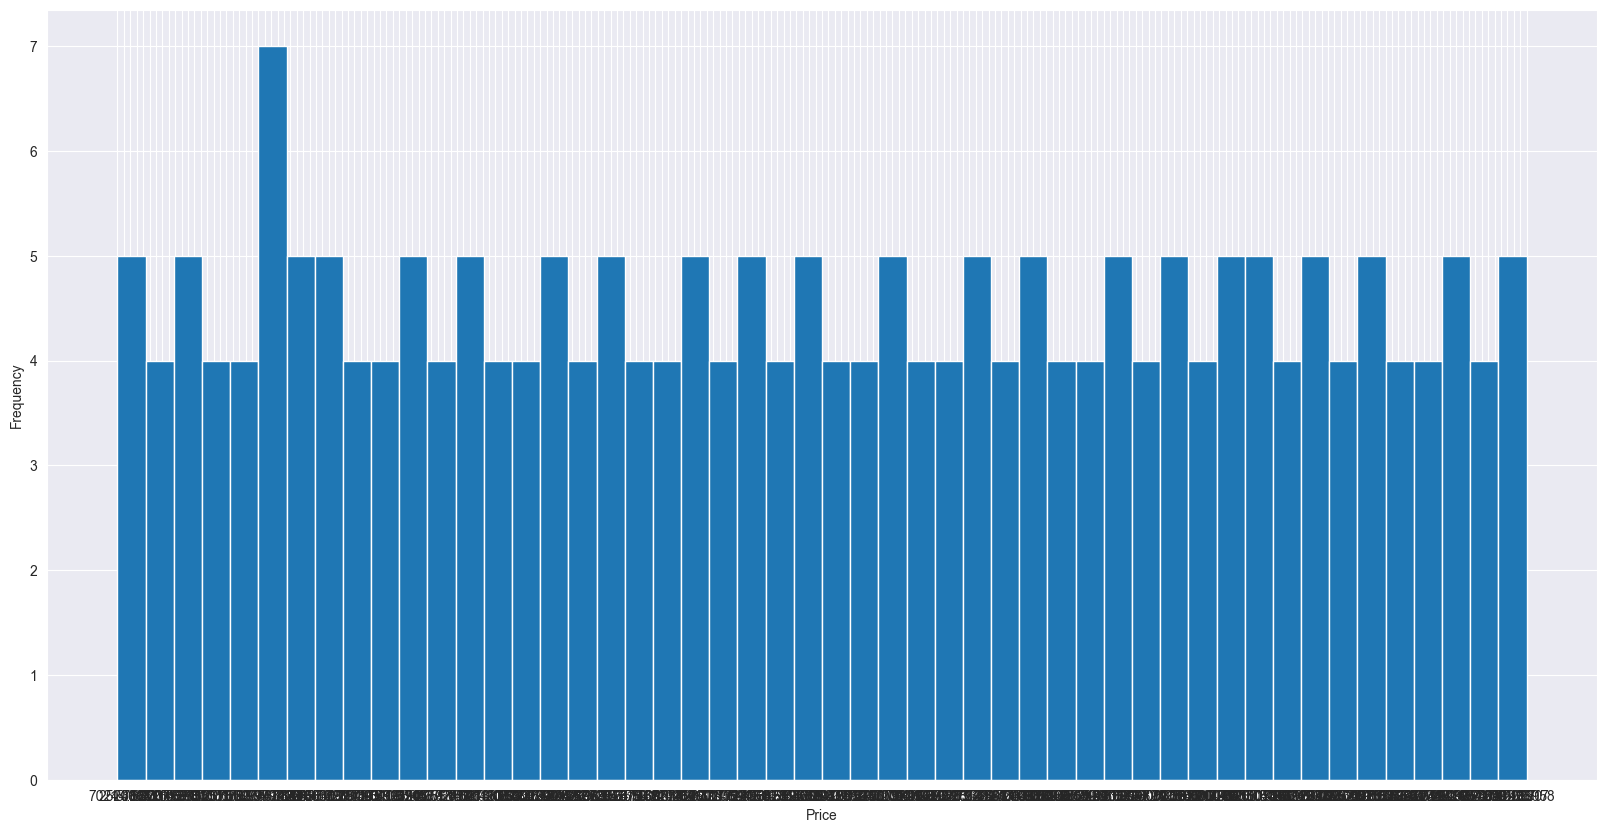

In [25]:
plt.figure(figsize=(20, 10))
plt.hist(all_elements_df['price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Add as many code boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [ ]:
# Write your code here.

In [5]:
browser.get("https://finance.yahoo.com/markets/crypto/all/")

In [6]:
bitcoin_button = browser.find_element(By.CSS_SELECTOR, "tbody>tr>td>span>div>a[title='Bitcoin USD']")
bitcoin_button.click()

In [7]:
historical_data_button = browser.find_element(By.CSS_SELECTOR, "a[category='history']")
historical_data_button.click()

In [8]:
rows = browser.find_elements(By.CSS_SELECTOR, "tbody>tr")

In [9]:
bitcoin_data = []
for row in rows:
    columns = row.find_elements(By.CSS_SELECTOR, "td")
    price = float(columns[2].text.replace(",", ""))
    volume = columns[6].text.replace(",", "")
    bitcoin_dict = {
        "price": price,
        "volume": volume
    }
    bitcoin_data.append(bitcoin_dict)
    
len(bitcoin_data)
    

367

In [31]:
bitcoin_data_df = pd.DataFrame(bitcoin_data)
bitcoin_data_df = bitcoin_data_df[::-1].reset_index(drop=True)
bitcoin_data_df

,price,volume
0,34942.47,17158456701
1,35256.03,9561294264
2,35340.34,12412743996
3,35286.03,12693436420
4,35892.42,18834737789
...,...,...
362,72905.30,40646637831
363,72662.31,40627912076
364,71559.02,49989795365
365,69867.35,18184612091


In [ ]:
# Add as many code boxes as you need.

In [36]:
#bitcoin_data_df = bitcoin_data_df.sort_values("")
plt.figure(figsize=(20, 6))
plt.plot(bitcoin_data_df['volume'], bitcoin_data_df['price'])
plt.show()

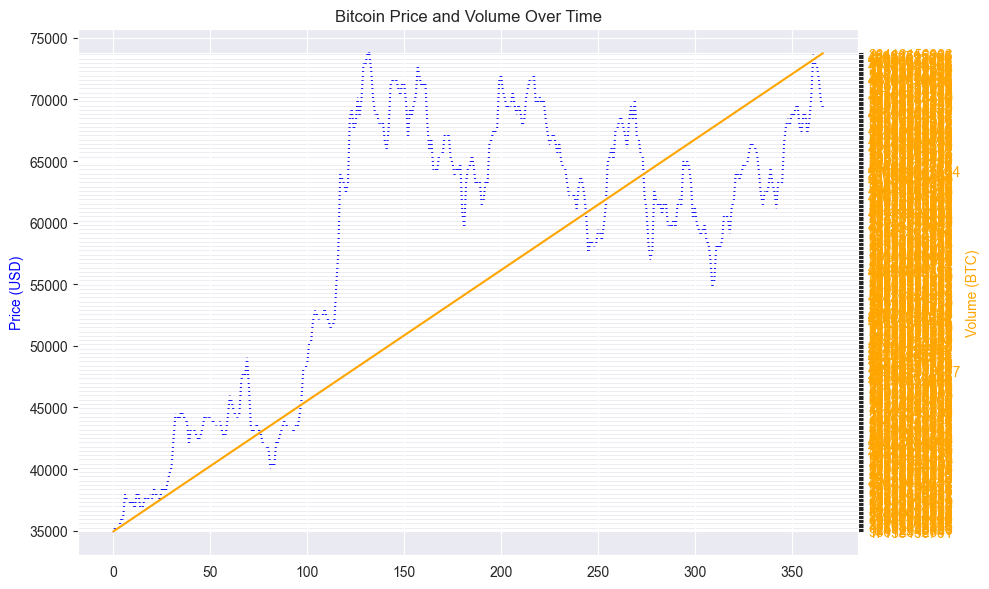

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(bitcoin_data_df.index, bitcoin_data_df['price'], color='blue', label='Price')
ax1.set_ylabel('Price (USD)', color='blue')

ax2 = ax1.twinx()
ax2.plot(bitcoin_data_df.index, bitcoin_data_df['volume'], color='orange', label='Volume')
ax2.set_ylabel('Volume (BTC)', color='orange')

plt.title('Bitcoin Price and Volume Over Time')
fig.tight_layout()
plt.show()